# What is IForest behavior according to the dataset dimension size?

## Test with 1 dimension dataset

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_brut, y_transform, full_dataset = dts.TwoD_V3_0_0()
X_brut.describe()

Columns number = 3


,0,1
count,1516.000000,1516.000000
mean,0.106715,0.061584
std,5.677573,5.660294
min,-8.915518,-8.958214
25%,-5.464237,-5.400893
50%,-0.001641,0.054962
75%,5.798146,5.645895
max,8.977673,8.983557


In [4]:
dts.description

"Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus éloignées des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -5 et 5, X2 entre -7 et 7, size = 1500, distance euclidienne entre 5 et 7 (Grand cercle de rayon 7 et petit cercle de rayon 5) \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15."

In [5]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 3 columns):
0    1516 non-null float64
1    1516 non-null float64
2    1516 non-null object
dtypes: float64(2), object(1)
memory usage: 35.7+ KB


In [6]:
X_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 2 columns):
0    1516 non-null float64
1    1516 non-null float64
dtypes: float64(2)
memory usage: 23.8 KB


In [7]:
y_transform.describe()

,0
count,1516.000000
mean,0.980211
std,0.198020
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
y_transform

,0
0,1
1,1
2,1
3,1
4,1
...,...
1511,-1
1512,-1
1513,-1
1514,-1


## Execution of Iforest to get the best performance

In [9]:
roc_aucs = []
specificities = []
for i in range(10):
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, IFD_y_pred_IF))
    #ROC AUC
    roc_aucs.append(roc_auc_score(y_transform, IFD_y_pred_IF))
    # Specificity
    specificities.append(specificity_score(y_transform, IFD_y_pred_IF))
print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

[[   2   13]
 [ 118 1383]]
[[   2   13]
 [ 119 1382]]
[[   1   14]
 [ 128 1373]]
[[   0   15]
 [ 130 1371]]
[[   2   13]
 [ 132 1369]]
[[   0   15]
 [ 135 1366]]
[[   0   15]
 [ 141 1360]]
[[   3   12]
 [ 135 1366]]
[[   0   15]
 [ 128 1373]]
[[   0   15]
 [ 131 1370]]
ROC AUC
[0.5273595380857206, 0.5270264268265601, 0.49069509216078167, 0.45669553630912724, 0.5226959804574728, 0.45502998001332445, 0.4530313124583611, 0.5550299800133245, 0.4573617588274484, 0.4563624250499667]
Specificities
[0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.0, 0.13333333333333333, 0.0, 0.0, 0.2, 0.0, 0.0]
min_roc_auc = 0.5550299800133245


In [10]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("threshold = "+str(i))
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=i)
    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, IFD_y_pred_IF))

threshold = 0.1
[[  15    0]
 [1501    0]]
threshold = 0.2
[[  15    0]
 [1501    0]]
threshold = 0.30000000000000004
[[  15    0]
 [1501    0]]
threshold = 0.4
[[  15    0]
 [1501    0]]
threshold = 0.5
[[  15    0]
 [1501    0]]
threshold = 0.6
[[  14    1]
 [ 153 1348]]
threshold = 0.7000000000000001
[[   0   15]
 [   0 1501]]
threshold = 0.8
[[   0   15]
 [   0 1501]]
threshold = 0.9
[[   0   15]
 [   0 1501]]


In [11]:
(119/(119+1382))*100

7.928047968021319

### Execution Of EIF on dataset

In [12]:
import eif
X_brut_numpy = X_brut.to_numpy()

In [13]:
F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
S1 = F1.compute_paths(X_in=X_brut_numpy)
P1 = np.where(S1>=threshold,-1,1)

# Matrice de confusion
#ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
print(confusion_matrix(y_transform, P1))

[[   0   15]
 [   1 1500]]


In [14]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("threshold = "+str(i))
    # Instanciation, fit and predict
    F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
    S1 = F1.compute_paths(X_in=X_brut_numpy)
    P1 = np.where(S1>=i,-1,1)
    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, P1))

threshold = 0.1
[[  15    0]
 [1501    0]]
threshold = 0.2
[[  15    0]
 [1501    0]]
threshold = 0.30000000000000004
[[  15    0]
 [1501    0]]
threshold = 0.4
[[  15    0]
 [1501    0]]
threshold = 0.5
[[  15    0]
 [1134  367]]
threshold = 0.6
[[   0   15]
 [   0 1501]]
threshold = 0.7000000000000001
[[   0   15]
 [   0 1501]]
threshold = 0.8
[[   0   15]
 [   0 1501]]
threshold = 0.9
[[   0   15]
 [   0 1501]]


EIF ne détecte pas les anomalies. En fait, EIF considère toutes les données comme étant normales

In [15]:
roc_auc_IF = []
max_samples_IF = []
specificities = []

for j in range(min_sample_size, len(X_brut), sample_size_step):
    print("max_samples = "+str(j))
    max_samples = j
    # Instanciation, fit and predict
    func_IF = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IF.fit(X_brut)
    y_pred_IF, scores = func_IF.predict(X=X_brut, threshold=threshold)
    
    #Confusion matrix
    print(confusion_matrix(y_transform, y_pred_IF))
    
    # Specificity
    specificities.append(specificity_score(y_transform, y_pred_IF))

    auc_IF = roc_auc_score(y_transform, y_pred_IF)
    if auc_IF >= min_roc_auc:
        print("auc_IF = "+str(auc_IF))
        roc_auc_IF.append(auc_IF)
        max_samples_IF.append(j)

max_samples = 5
[[  15    0]
 [1501    0]]
max_samples = 10
[[  15    0]
 [1501    0]]
max_samples = 15
[[  15    0]
 [1501    0]]
max_samples = 20
[[  15    0]
 [1501    0]]
max_samples = 25
[[  15    0]
 [1501    0]]
max_samples = 30
[[  15    0]
 [1501    0]]
max_samples = 35
[[  15    0]
 [1501    0]]
max_samples = 40
[[  15    0]
 [1501    0]]
max_samples = 45
[[  15    0]
 [1501    0]]
max_samples = 50
[[  15    0]
 [1501    0]]
max_samples = 55
[[  15    0]
 [1501    0]]
max_samples = 60
[[  15    0]
 [1501    0]]
max_samples = 65
[[  15    0]
 [1501    0]]
max_samples = 70
[[  15    0]
 [1501    0]]
max_samples = 75
[[  15    0]
 [1501    0]]
max_samples = 80
[[  15    0]
 [1501    0]]
max_samples = 85
[[  15    0]
 [1501    0]]
max_samples = 90
[[  15    0]
 [1501    0]]
max_samples = 95
[[  15    0]
 [1501    0]]
max_samples = 100
[[  15    0]
 [1478   23]]
max_samples = 105
[[  15    0]
 [1464   37]]
max_samples = 110
[[  15    0]
 [1488   13]]
max_samples = 115
[[  15    0]

[[   0   15]
 [   9 1492]]
max_samples = 860
[[   0   15]
 [   5 1496]]
max_samples = 865
[[   0   15]
 [  11 1490]]
max_samples = 870
[[   0   15]
 [   8 1493]]
max_samples = 875
[[   0   15]
 [   9 1492]]
max_samples = 880
[[   0   15]
 [  10 1491]]
max_samples = 885
[[   0   15]
 [   8 1493]]
max_samples = 890
[[   0   15]
 [   7 1494]]
max_samples = 895
[[   0   15]
 [  10 1491]]
max_samples = 900
[[   0   15]
 [  10 1491]]
max_samples = 905
[[   0   15]
 [  14 1487]]
max_samples = 910
[[   0   15]
 [  11 1490]]
max_samples = 915
[[   0   15]
 [   5 1496]]
max_samples = 920
[[   0   15]
 [   8 1493]]
max_samples = 925
[[   0   15]
 [   9 1492]]
max_samples = 930
[[   0   15]
 [  11 1490]]
max_samples = 935
[[   0   15]
 [   6 1495]]
max_samples = 940
[[   0   15]
 [   7 1494]]
max_samples = 945
[[   0   15]
 [   6 1495]]
max_samples = 950
[[   0   15]
 [   8 1493]]
max_samples = 955
[[   0   15]
 [   8 1493]]
max_samples = 960
[[   0   15]
 [  10 1491]]
max_samples = 965
[[   0   1

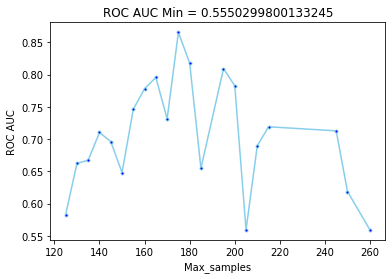

In [16]:
visu.plot_2D(max_samples_IF, roc_auc_IF,'Max_samples', 'ROC AUC', "ROC AUC Min = "+str(min_roc_auc), link="b").show()

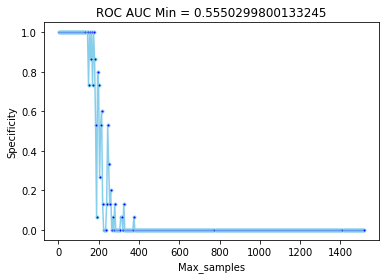

In [17]:
visu.plot_2D(range(min_sample_size, len(X_brut), sample_size_step), specificities,'Max_samples', 'Specificity', "ROC AUC Min = "+str(min_roc_auc), link="b").show()

## Conclusion

IForest ne détecte pas les anomalies et fais de fausses alertes.